In [1]:
kenketu_num=""  #10桁の献血者コード
kenketu_pass=""  #ログイン時パスワード
kenketu_record_pass=""  #献血記録の確認用パスワード

In [2]:
from selenium import webdriver
import time
import pandas as pd
import pyautogui as pgui
# options = Opetions = Options()
# chrome_path = '/Applications/Google Chrome.app/Contents/MacOS/Google Chrome'
# options.add_argument('--headless')
# !pip install selenium
# !pip install chromedriver-binary==89.0.4389.23.0
# !pip install webdriver-manager
import chromedriver_binary
from webdriver_manager.chrome import ChromeDriverManager


from selenium import webdriver              # Webブラウザを自動操作する（python -m pip install selenium)
import chromedriver_binary                  # パスを通すためのコード
from selenium.webdriver.chrome.options import Options # オプションを使うために必要

import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
# !pip install japanize-matplotlib

In [3]:
option = Options()                         
# option.add_argument('--headless')          
browser = webdriver.Chrome(ChromeDriverManager().install(),options=option)



====== WebDriver manager ======
Current google-chrome version is 97.0.4692
Get LATEST driver version for 97.0.4692
Driver [/Users/suiri/.wdm/drivers/chromedriver/mac64/97.0.4692.71/chromedriver] found in cache


In [4]:
# browser=webdriver.Chrome()

In [5]:
url_login="https://www.kenketsu.jp/recordinspectionresult"
browser.get(url_login)
time.sleep(3)
print("ログインページにアクセスしました")

ログインページにアクセスしました


In [6]:
element=browser.find_element_by_name("Login:j_id38:j_id40")
element.clear
element.send_keys(kenketu_num)
element=browser.find_element_by_name("Login:j_id38:j_id42")
element.clear
element.send_keys(kenketu_pass)
print("フォームを送信")

フォームを送信


In [7]:
browser_from=browser.find_element_by_class_name("mod-btn")
time.sleep(3)
browser_from.click()
print("ログインした")
time.sleep(3)


ログインした


In [8]:
browser_from=browser.find_element_by_class_name("mod-nav__mypage")
time.sleep(3)
browser_from.click()

time.sleep(3)
kenkai_path=browser.find_element_by_xpath("/html/body/div/main/div[1]/div/div[1]/dl/dd/strong")
kenkai=int(kenkai_path.text)
print("献血回数="+str(kenkai))
zenkai=browser.find_element_by_class_name("has-fs-14")
zenkai=zenkai.text[6:]

献血回数=22


In [9]:
url="https://www.kenketsu.jp/RecordLogin"
time.sleep(1)
browser.get(url)
print(url,"アクセス完了")

https://www.kenketsu.jp/RecordLogin アクセス完了


In [10]:
frm=browser.find_element_by_xpath("/html/body/div/main/article/form/div[1]/div/section/table/tbody/tr/td/input")
frm.clear
frm.send_keys(kenketu_record_pass)
print("パスを送信")

パスを送信


In [11]:
browser_from_pass=browser.find_element_by_class_name("mod-btn")
time.sleep(3)
browser_from_pass.click()
print("ログインした")

ログインした


In [12]:
elem_result=browser.find_element_by_xpath("//*[@id='RecordInspectionResult:Details']/div[1]/section/div[3]/div[2]/ul")


In [13]:
konkai=browser.find_element_by_xpath('/html/body/div/main/article/div/div/div[1]/div/div[1]/div[2]/div/div[17]/div/div[2]')
konkai=konkai.text
print(zenkai)
print(konkai)
if zenkai!=konkai:
    kenkai-=1

    
    
hiraku=browser.find_element_by_xpath("//*[@id='RecordInspectionResult:Details']/div[1]/section/div[1]/div[3]/span[1]")
hiraku.click()

kijunti=[]
all_kijun=[]
kagen=["0","0","0"]
jougen=["0","0","0"]
ass=browser.find_elements_by_class_name("mod-result-table__graph__ttl")


for a in ass:
    sp1=a.text.find(" ")
    sp2=a.text.find(" ",sp1+1)
    sp3=a.text.find(" ",sp2+1)
    rsp=a.text.rfind(" ")

    x=a.text[sp1+1:sp2-1]
    z=a.text[sp2+1:sp3]
    y=a.text[sp1+1:rsp]
    if x=="16.":
        x="0"
        z="16.5"
        y="16.5%未満"
    elif x=="1.3":
        z="2.1"
        y="1.3〜 2.1"
    kagen.append(float(x))
    jougen.append(float(z))
    kijunti.append(y)
all_kijun.append(kagen)
all_kijun.append(jougen)

df_kagen=pd.DataFrame()
df_jougen=pd.DataFrame()
all_kagen=[]
all_jougen=[]
for i in range(18):
    kagensyu=[]
    jougensyu=[]
    for _ in range(kenkai):
        kagensyu.append(kagen[i])
        jougensyu.append(jougen[i])
    all_kagen.append(kagensyu)
    all_jougen.append(jougensyu)
    df_kagen[str(i)]=kagensyu
    df_jougen[str(i)]=jougensyu



2022/1/7



In [14]:
values=[]
elems_res=browser.find_elements_by_class_name("mod-result-table__data")
for elem_res in elems_res:
    values.append(elem_res.text)

In [15]:
keys=[]
elems_key=browser.find_elements_by_class_name("mod-result-table__label")
for elem_key in elems_key:
    if elem_key.text!='アルブミン対グロブリン比\u3000A/G':
        keys.append(elem_key.text)
    else:
        keys.append("アルブミン対グロブリン比")

In [16]:
df=pd.DataFrame()
df['項目']=keys
df['値']=values

In [17]:
values=[]
elems_res=browser.find_elements_by_class_name("mod-result-table__data")
for elem_res in elems_res:
    sp=elem_res.text.find(" ")
    elem_res=elem_res.text[:sp]
    values.append(elem_res)

In [18]:
all_dates=[]
all_values=[]
values00=[]
values01=[]
values02=[]
elems_res=browser.find_elements_by_class_name("mod-result-table__data")
elems_date=browser.find_elements_by_class_name("mod-past-data__date")
for elem_date in elems_date:
    if elem_date.text!="":
        all_dates.append(elem_date.text)
    

all_dates.reverse()
all_dates=[i for i in all_dates if i != ""]



for elem_res in elems_res:
    sp=elem_res.text.find(" ")
    rsp=elem_res.text.rfind(" ")+1
    x=elem_res.text[rsp:]
    y=elem_res.text[sp+1:rsp]
    z=elem_res.text[:sp]
    values00.append(x)
    values01.append(y)
    values02.append(z)
all_values.append(values00)
all_values.append(values01)
all_values.append(values02)

In [19]:
for i in range(kenkai-3):
    browser_past=browser.find_element_by_class_name("mod-past-data__btn")

    browser_past.click()
    time.sleep(1) 
    browser_henko=browser.find_element_by_class_name("mod-btn")

    browser_henko.click()
    
    time.sleep(2) 

    values=[]
    dates=[]
    elems_res=browser.find_elements_by_class_name("mod-result-table__data")
    elems_date=browser.find_elements_by_class_name("mod-past-data__date")

    for elem_res in elems_res:
        sp=elem_res.text.find(" ")
        elem_res=elem_res.text[:sp]
        values.append(elem_res)

    for elem_date in elems_date:
        if elem_date.text!="":
            all_dates.append(elem_date.text)
            break

    all_values.append(values)


all_dates=[i for i in all_dates if i != ""]

all_dates.reverse()
all_values.reverse()

In [20]:
al_vt=[list(x) for x in zip(*all_values)]

df=pd.DataFrame()
df['日付']=all_dates
for i in range(18):

    df[str(keys[i])]=al_vt[i]
df=df.set_index('日付')


In [21]:
df.to_excel("ketu.xlsx",index=False)

In [22]:
df_ketu=pd.read_excel("ketu.xlsx",sheet_name="Sheet1")
df_ketu.head()

,血圧（最高）,血圧（最低）,脈拍,ALT（GPT）,γ-GTP,総蛋白 TP,アルブミン ALB,アルブミン対グロブリン比,コレステロール CHOL,グリコアルブミン GA,赤血球数 RBC,ヘモグロビン量 Hb,ヘマトクリット値 Ht,平均赤血球容積 MCV,平均赤血球ヘモグロビン量 MCH,平均赤血球ヘモグロビン濃度 MCHC,白血球数 WBC,血小板数 PLT
0,137,72,75,10,13,7.6,5.0,1.9,145,13.5,459,14.2,42.9,93.5,30.9,33.1,40,19.4
1,133,74,101,16,15,8.1,5.2,1.8,144,13.3,506,15.9,45.8,90.5,31.4,34.7,38,20.8
2,126,73,80,10,15,7.9,4.8,1.6,151,14.2,482,15.1,44.3,91.9,31.3,34.1,40,26.4
3,122,84,117,20,17,8.2,5.2,1.7,168,14.2,503,15.7,45.8,91.1,31.2,34.3,36,22.5
4,119,71,96,13,17,8.1,5.1,1.7,138,14.4,497,15.0,44.6,89.7,30.2,33.6,34,23.1


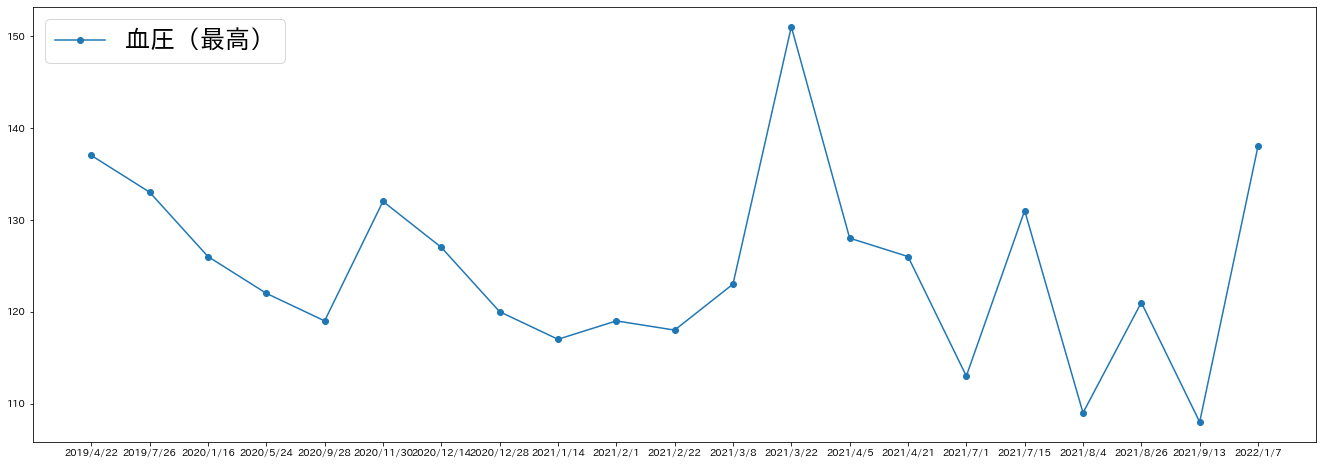

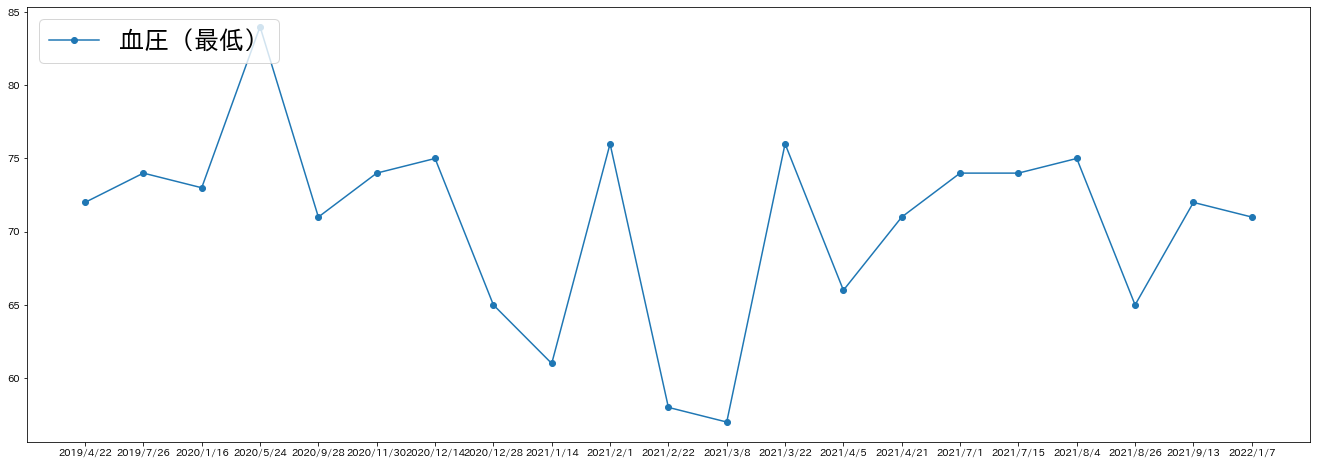

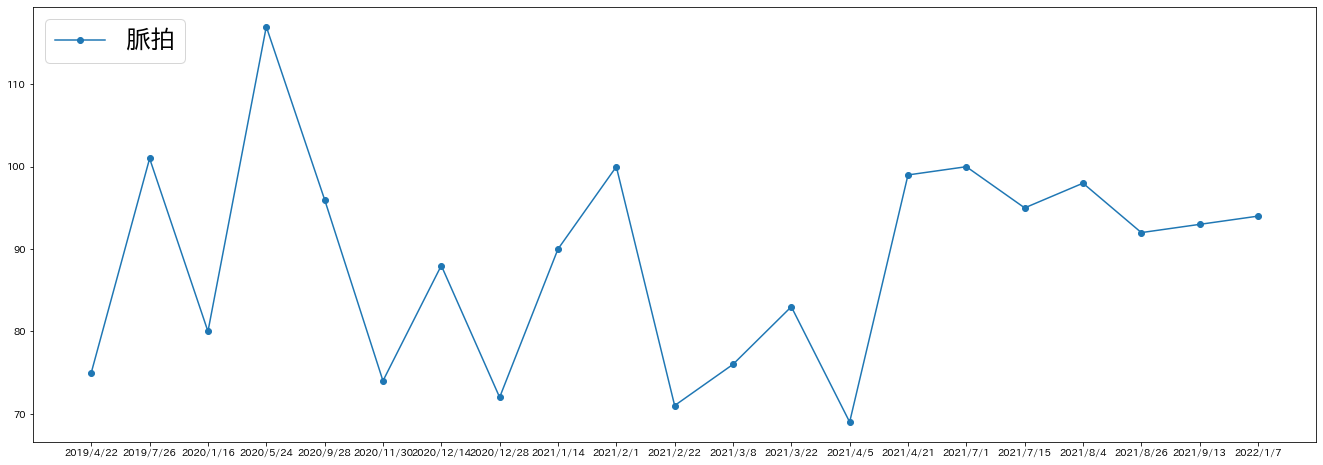

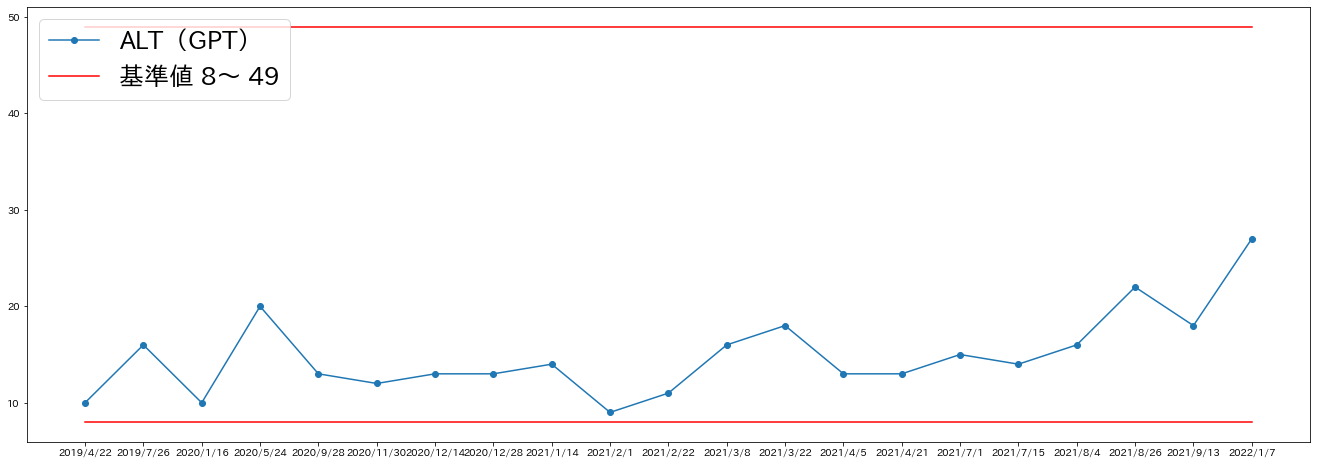

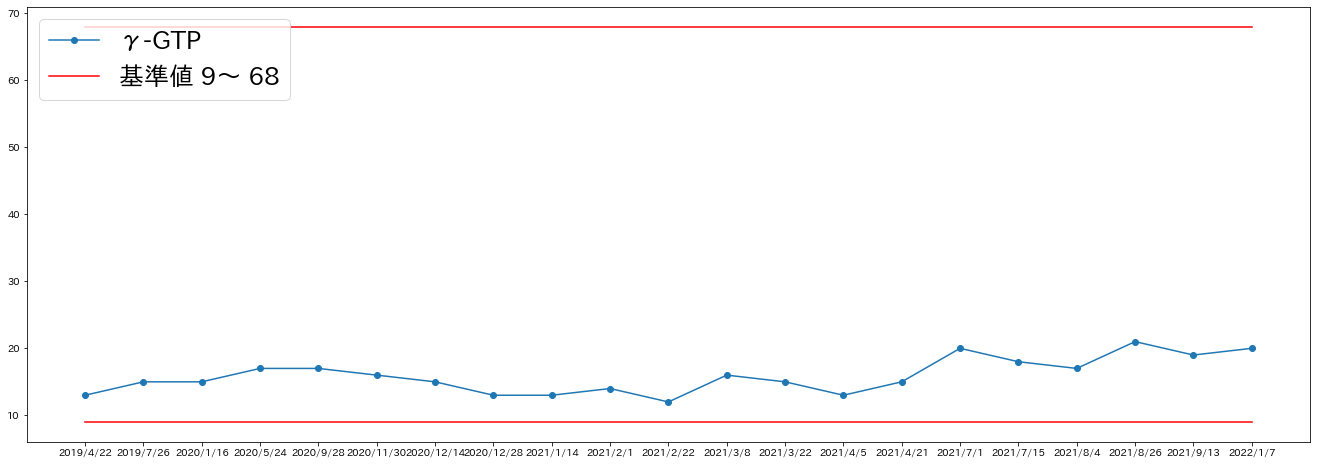

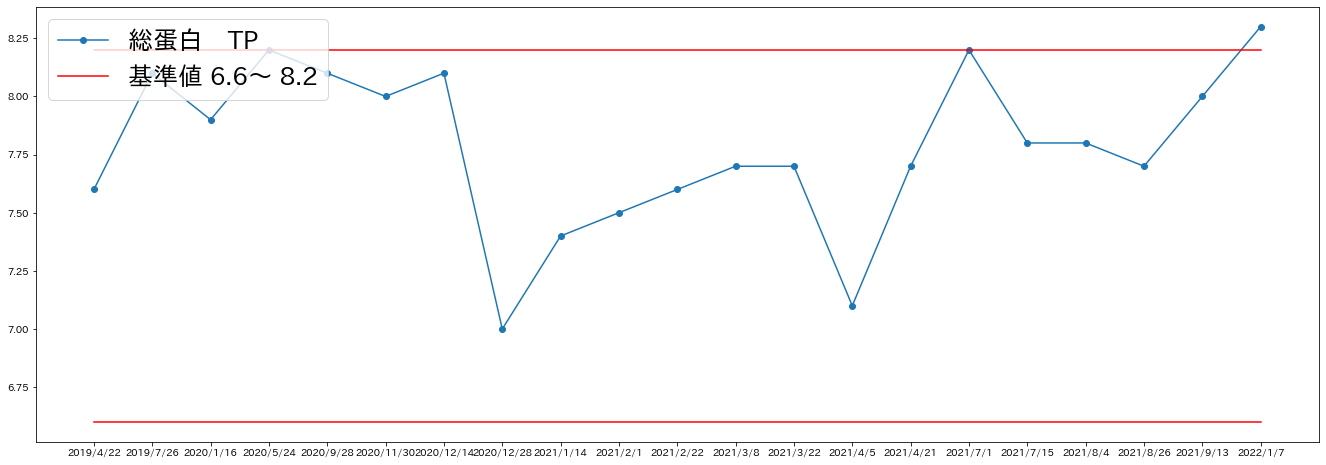

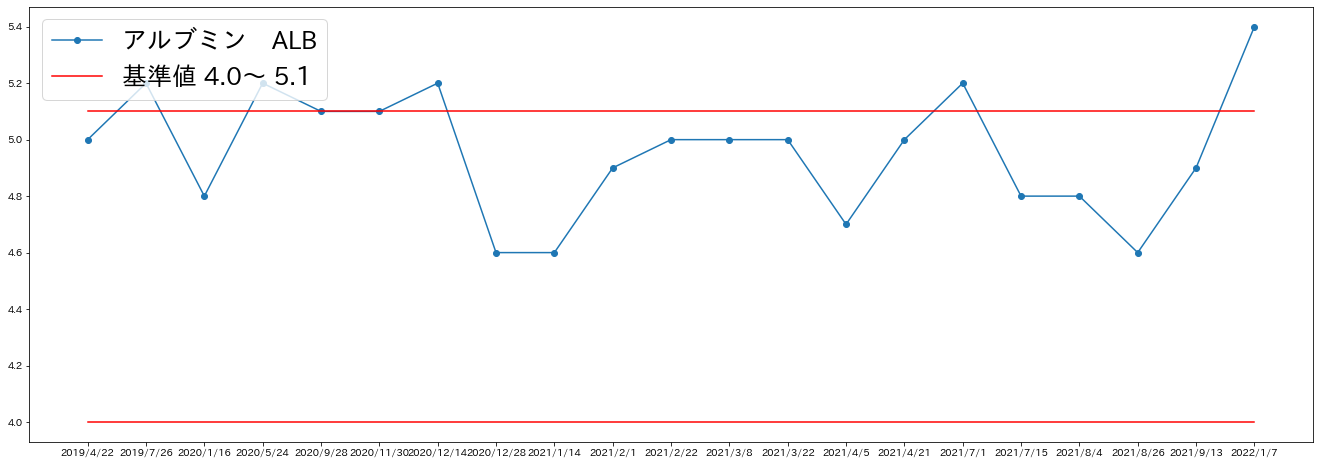

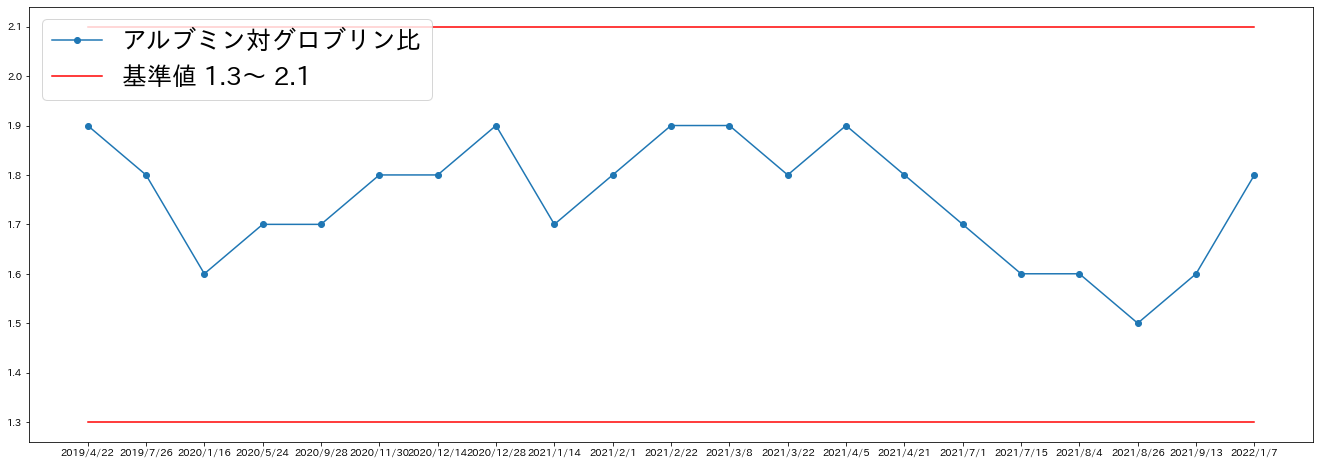

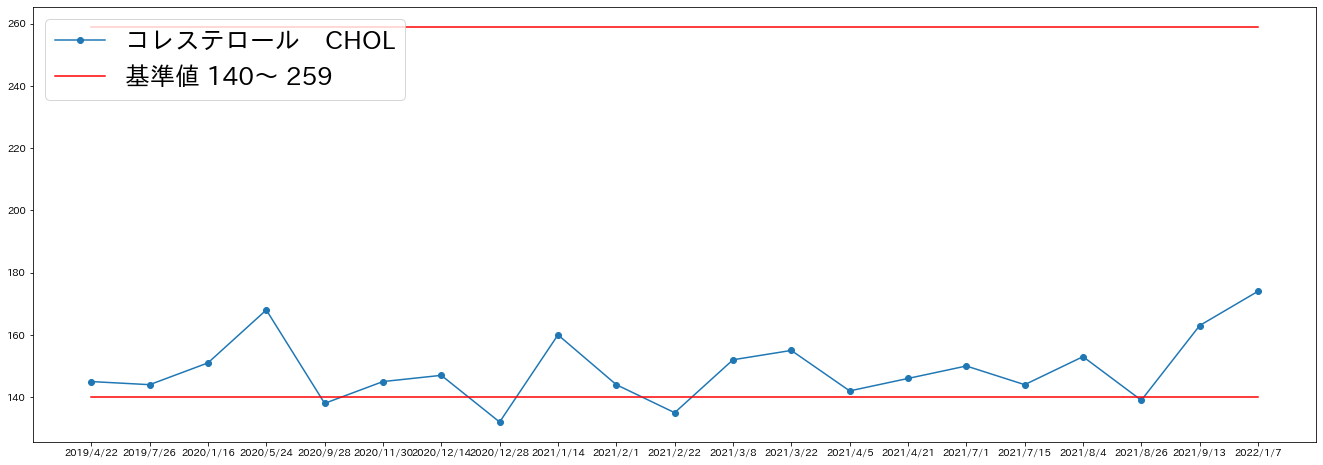

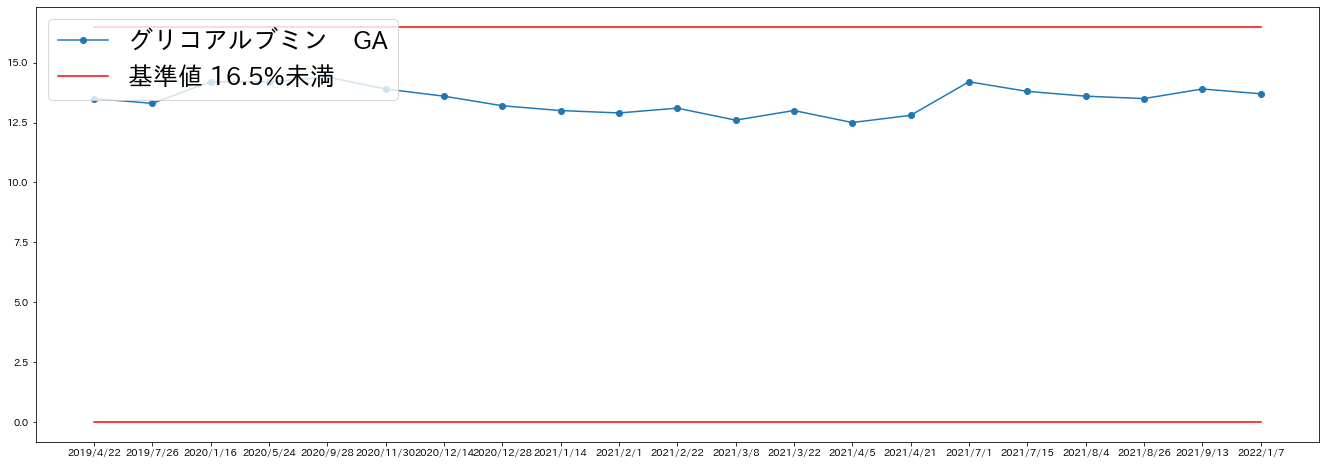

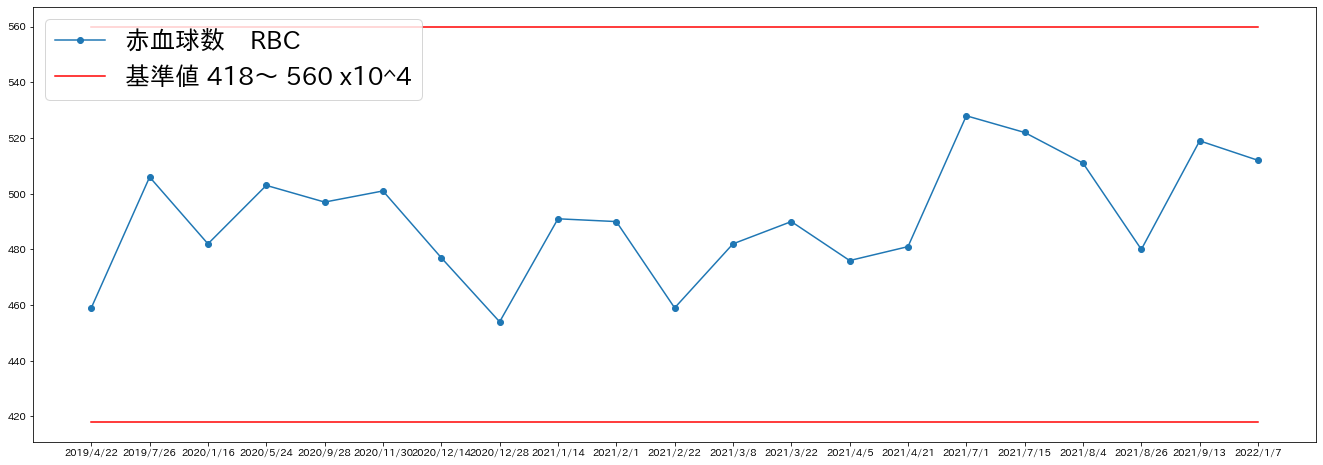

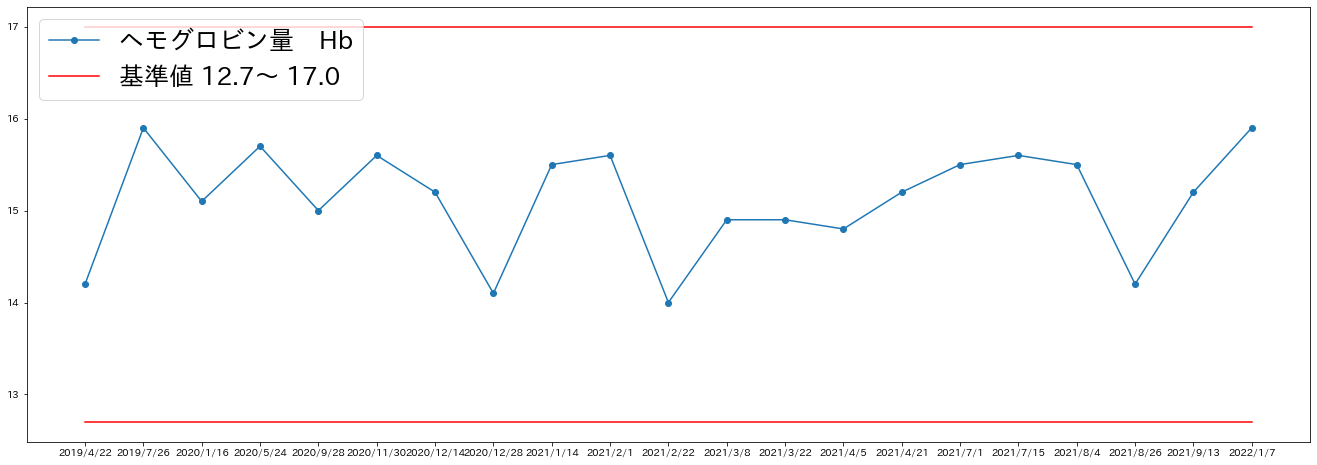

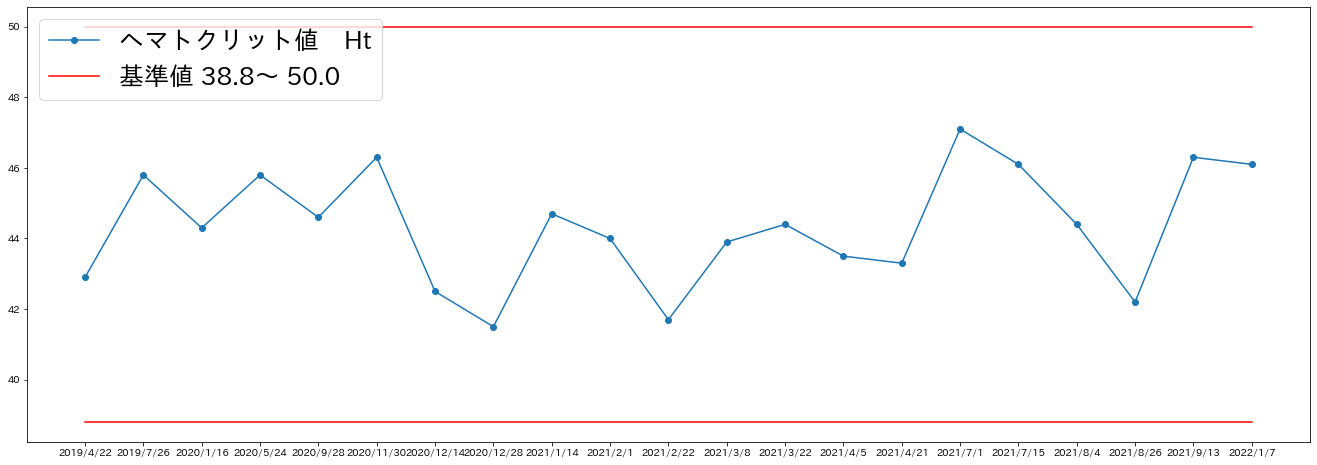

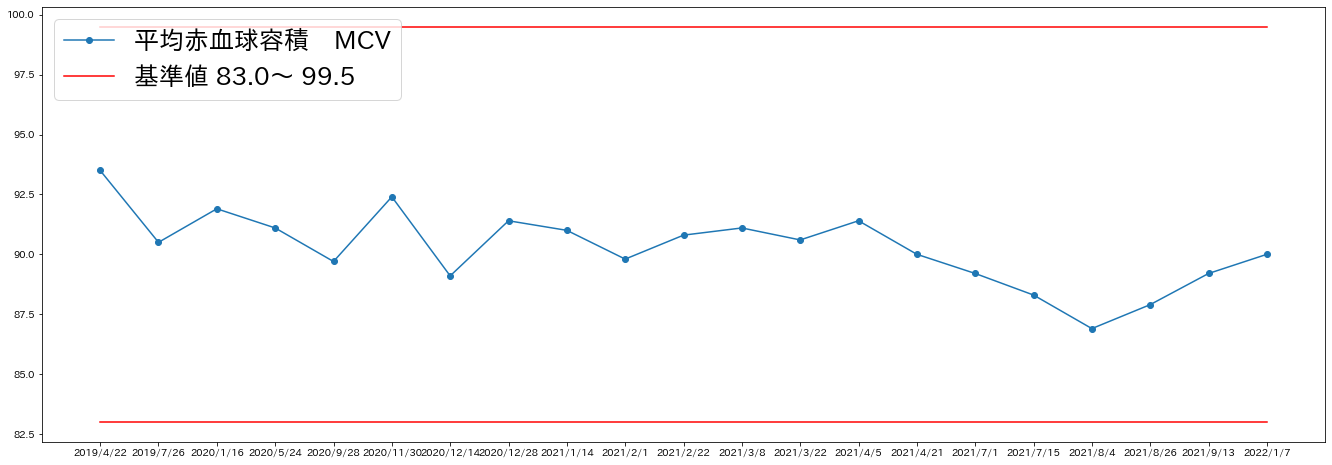

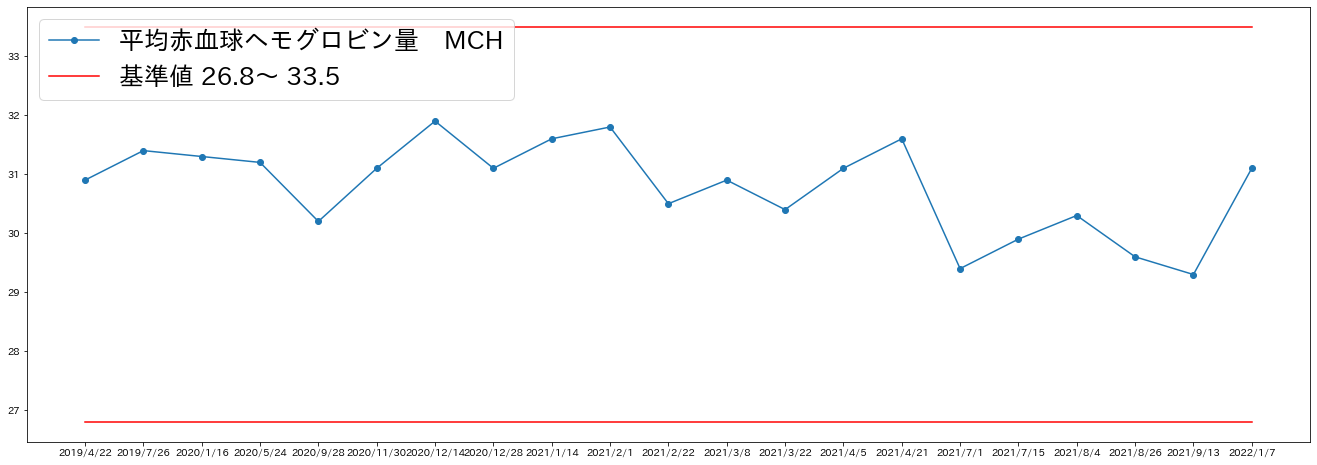

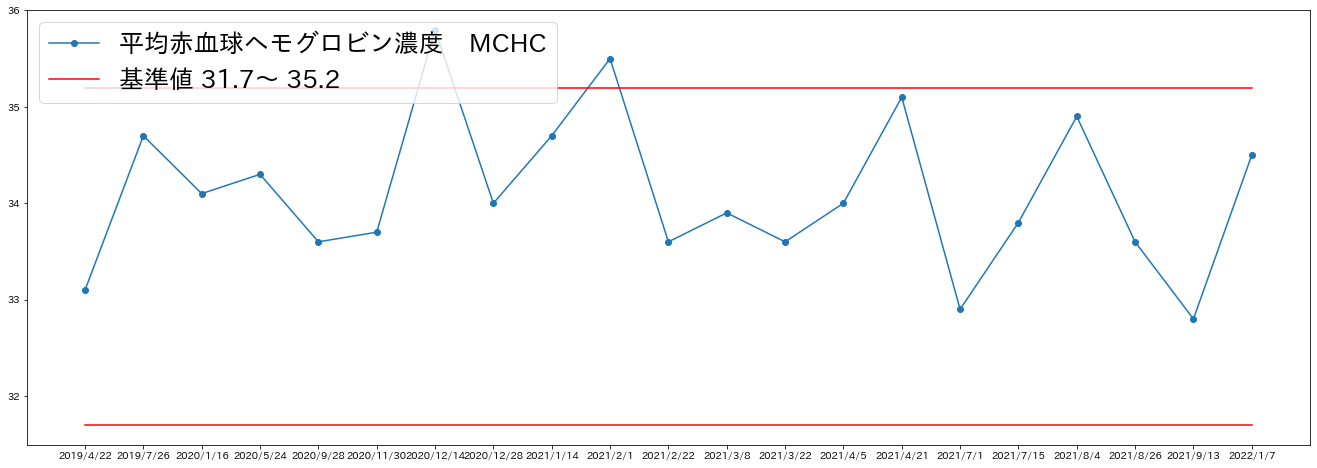

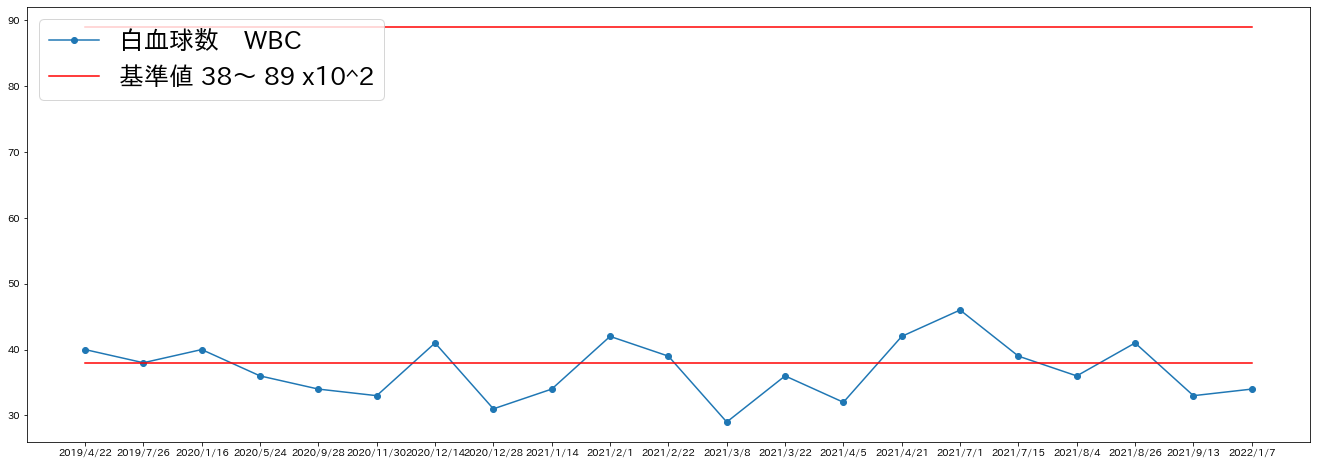

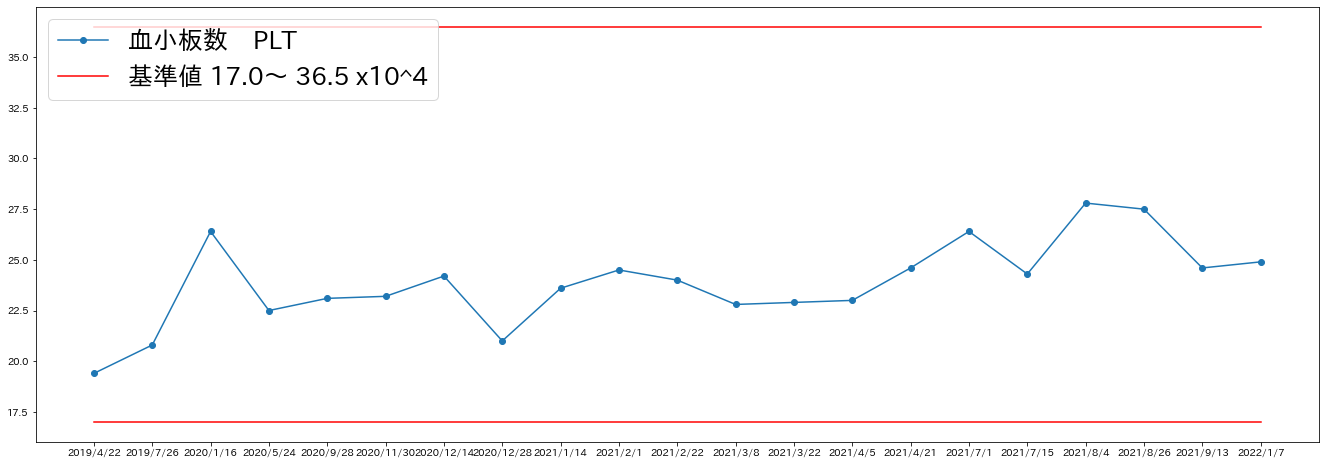

In [23]:
for i in range(18):
    

    plt.figure(figsize=(kenkai+2,8))

    x=df.index
    y1=df_ketu[str(keys[i])]
    y2=df_kagen[str(i)]
    y3=df_jougen[str(i)]
    
    
#     if kijungai==True:
#         plt.plot(x,y1,label=str(keys[i]),marker="o",markeredgewidth=3,markeredgecolor="r")
#     else:
#         plt.plot(x,y1,label=str(keys[i]),marker="o")
        
    plt.plot(x,y1,label=str(keys[i]),marker="o")
    if not(i==0 or i==1 or i==2) :
        pass
        plt.plot(x,y2,label="基準値 "+str(kijunti[i-3]),color="red")
        plt.plot(x,y3,color="red")
    plt.legend(fontsize=25,loc="upper left")
    plt.savefig(str(keys[i])+".png",dpi=60)
    
# driver.quit()